In [1]:
# Mount Drive & load cleaned data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet('/content/drive/MyDrive/processed_reviews.parquet')
print("Rows:", len(df))

Rows: 72000


In [4]:
df.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,name,categories,...,longitude,review_count,stars_y,clean_text,toxicity_score,bias_similarity,is_biased,segment,chain,neighborhood_id
date,,,,,,,,,,,,,,,,,,,,,
2022-01-19 19:31:50,nM7O8RC4zXOKniGc9aIH-g,dr2ojpUUx5thYYG7yPpGlQ,OqysWiDpJJbeZpmk5QOdgA,4,0,0,0,Enjoyed their sausage pear sandwich immensely....,Lemon Tree,"Salad, Soup, Vegan, Restaurants, Sandwiches",...,-116.204337,197,4.5,enjoyed their sausage pear sandwich immensely ...,0.001931,0.224289,0,Restaurant,Other,0
2022-01-19 19:04:55,-9PpVEtDts6uyuBPPGgeyw,9HGNO6R2Mx18v97oJCCyyQ,m_maf3G3NThyC1ron-kXOA,5,0,0,0,Coffee is alright but can't beat the bang for ...,Zeppole Cafe,"Restaurants, Food, Bakeries, Sandwiches",...,-116.174175,42,3.5,coffee is alright but can t beat the bang for ...,0.001116,0.159959,0,Restaurant,Other,0
2022-01-19 03:05:54,gvEI6fgvZdA6j82gjKCrNw,4xYfmnd0wMTYqnTp7EjCbw,tNPX0ck7Hj6RchtICfF-Kg,5,1,0,0,How have I never been here before?! The servic...,Lucky Palace Chinese Restaurant,"Restaurants, Chinese",...,-116.290183,64,3.5,how have i never been here before the service ...,0.000912,0.203769,0,Restaurant,Other,0
2022-01-19 02:32:36,5C0iz8jGe31n91yrz_lXWw,_lxEn8XQmdPS8tVNFalaPg,YKhK6rCr7n0c2DaHkaZPDA,1,0,0,0,Place is open tell 9pm but according to the st...,Chuck E. Cheese,"Event Planning & Services, Party & Event Plann...",...,-116.259163,18,3.5,place is open tell 9pm but according to the st...,0.000933,0.191839,0,Restaurant,Other,0
2022-01-19 01:37:11,j8Gu72oHuCWODFvreXVEMA,zYAf93zsIbXIEJet-5_0Qw,oGvauLs2oFbLIBUjv5F77Q,5,0,0,0,Saw the reviews on yelp and could agree more. ...,Han's Chimaek,"Korean, Chicken Wings, Nightlife, Bars, Beer B...",...,-116.193377,80,5.0,saw the reviews on yelp and could agree more t...,0.000778,0.299419,0,Restaurant,Other,0


In [5]:
# Ensure the index is your datetime
if df.index.name != 'date':
    df.reset_index(inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

<ipython-input-6-912eb95164a3>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'segment'])
<ipython-input-6-912eb95164a3>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([pd.Grouper(freq='M'), 'segment'])


<Figure size 1000x500 with 0 Axes>

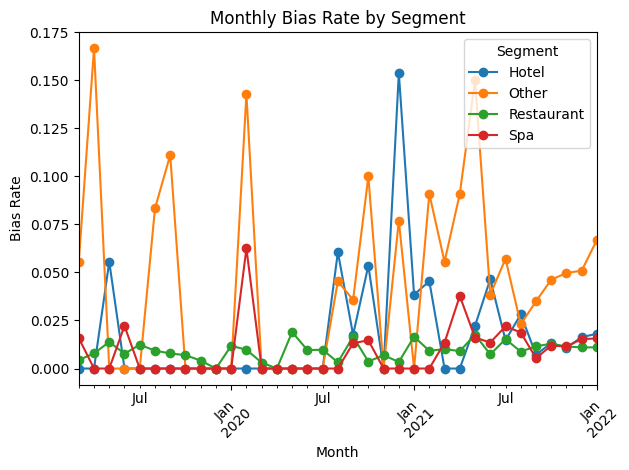

In [6]:
#  Monthly bias rate by segment (Hotel/Spa/Restaurant/Other)
monthly_seg = (
    df
    .groupby([pd.Grouper(freq='M'), 'segment'])
    .agg(total=('is_biased','size'), biased=('is_biased','sum'))
    .assign(bias_rate=lambda x: x['biased']/x['total'])
    .reset_index()
)
pivot = monthly_seg.pivot(index='date', columns='segment', values='bias_rate')
plt.figure(figsize=(10,5))
pivot.plot(marker='o')
plt.title("Monthly Bias Rate by Segment")
plt.ylabel("Bias Rate")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

<ipython-input-12-8c0487e1d5a7>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq='M'), 'segment'])
<ipython-input-12-8c0487e1d5a7>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([pd.Grouper(freq='M'), 'segment'])


<Figure size 1000x500 with 0 Axes>

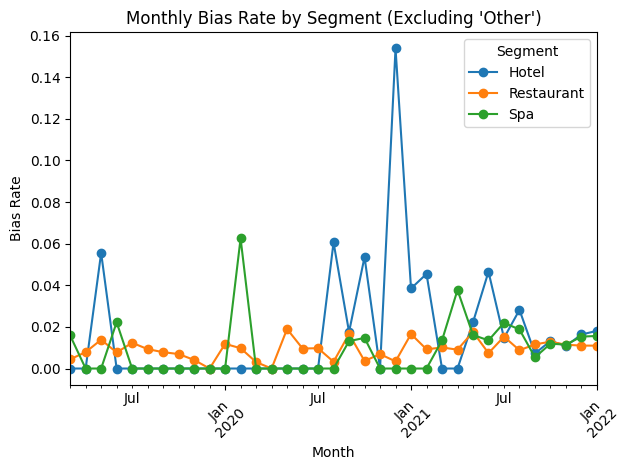

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load processed data
df = pd.read_parquet('/content/drive/MyDrive/processed_reviews.parquet')

# 2. Ensure datetime index
if df.index.name != 'date':
    df = df.reset_index().set_index('date')

# 3. Recompute monthly bias rates by segment
monthly_seg = (
    df
    .groupby([pd.Grouper(freq='M'), 'segment'])
    .agg(total=('is_biased','size'), biased=('is_biased','sum'))
    .assign(bias_rate=lambda x: x['biased']/x['total'])
    .reset_index()
)

# 4. Pivot and drop the 'Other' segment
pivot = monthly_seg.pivot(index='date', columns='segment', values='bias_rate')
pivot = pivot[['Hotel', 'Restaurant', 'Spa']]

# 5. Plot
plt.figure(figsize=(10,5))
pivot.plot(marker='o')
plt.title("Monthly Bias Rate by Segment (Excluding 'Other')")
plt.ylabel("Bias Rate")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


<ipython-input-7-efe54a54d492>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('segment')['is_biased']


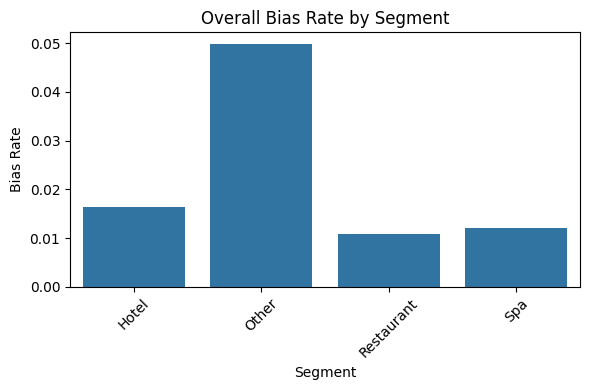

In [7]:
# Overall bias rate per segment
seg_rate = (
    df
    .groupby('segment')['is_biased']
    .agg(total='size', biased='sum')
    .assign(bias_rate=lambda x: x['biased']/x['total'])
    .reset_index()
)
plt.figure(figsize=(6,4))
sns.barplot(data=seg_rate, x='segment', y='bias_rate')
plt.title("Overall Bias Rate by Segment")
plt.ylabel("Bias Rate")
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-8-99d80572cfd9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('city')['is_biased']


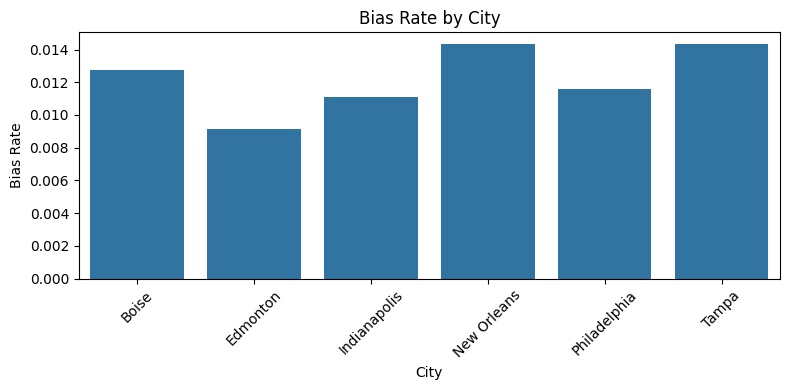

In [8]:
# City‐level bias rates
city_rate = (
    df
    .groupby('city')['is_biased']
    .agg(total='size', biased='sum')
    .assign(bias_rate=lambda x: x['biased']/x['total'])
    .reset_index()
    .sort_values('bias_rate', ascending=False)
)
plt.figure(figsize=(8,4))
sns.barplot(data=city_rate, x='city', y='bias_rate')
plt.title("Bias Rate by City")
plt.ylabel("Bias Rate")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-15-0636c3006e10>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('city')['is_biased']
<ipython-input-15-0636c3006e10>:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(stats['city'], rotation=45)


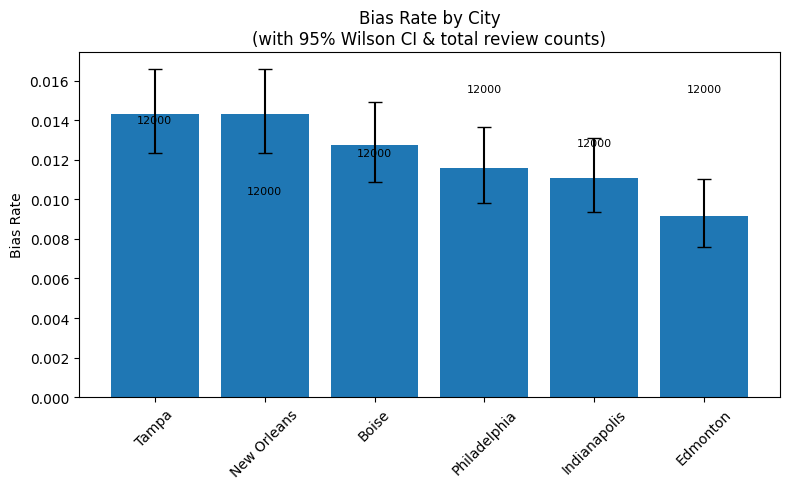

<ipython-input-15-0636c3006e10>:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['segment','city'])['is_biased']
<ipython-input-15-0636c3006e10>:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-15-0636c3006e10>:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-15-0636c3006e10>:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 

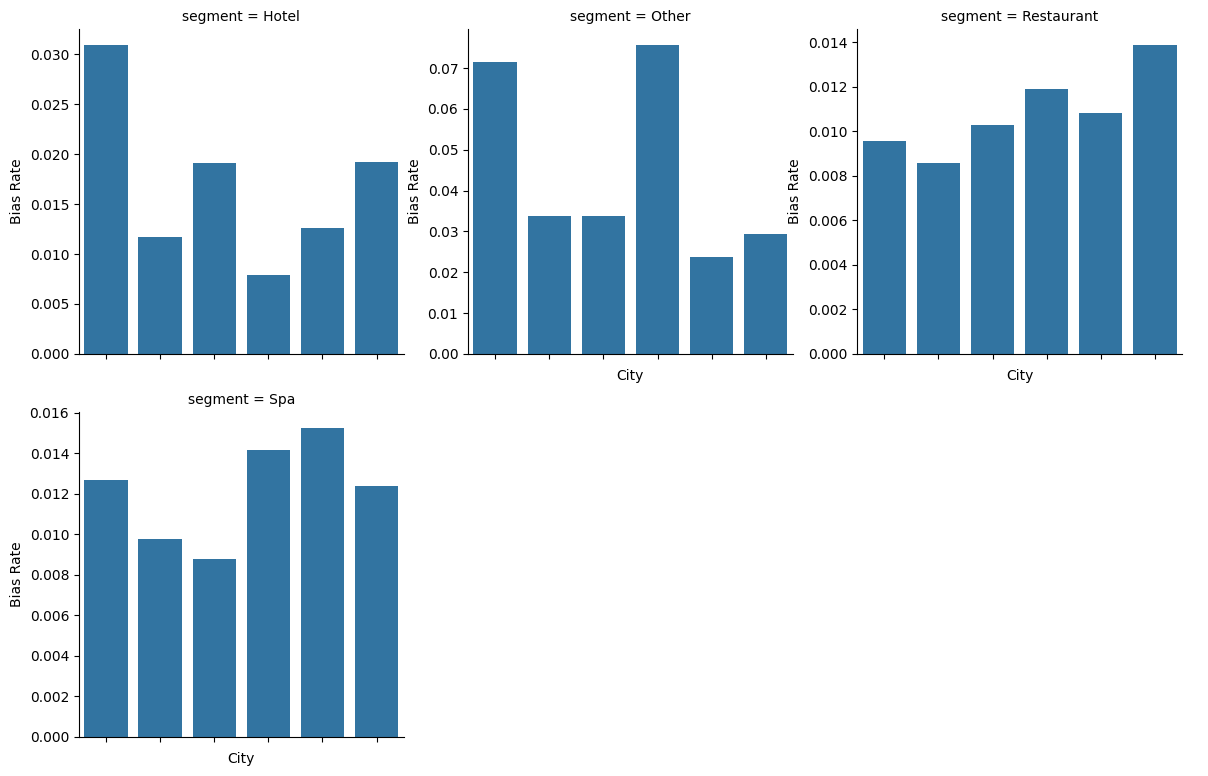

In [15]:
# import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# 2. Compute per-city bias stats and 95% Wilson CIs
from math import sqrt

stats = (
    df
    .groupby('city')['is_biased']
    .agg(total_reviews='size', biased='sum')
    .reset_index()
)
stats['bias_rate'] = stats['biased'] / stats['total_reviews']

# Wilson interval
z = 1.96
n = stats['total_reviews'].values
k = stats['biased'].values
p = k / n
center = (p + z**2/(2*n)) / (1 + z**2/n)
pm = z * np.sqrt(p*(1-p)/n + z**2/(4*n**2)) / (1 + z**2/n)
stats['ci_lower'] = center - pm
stats['ci_upper'] = center + pm

# 3. Sort descending by bias rate
stats = stats.sort_values('bias_rate', ascending=False)

# 4. Plot with error bars & annotate total review counts
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(
    stats['city'],
    stats['bias_rate'],
    yerr=[
        stats['bias_rate'] - stats['ci_lower'],
        stats['ci_upper'] - stats['bias_rate']
    ],
    capsize=5
)
for idx, row in stats.iterrows():
    ax.text(
        idx,
        row['bias_rate'] + 0.001,
        f"{row['total_reviews']}",
        ha='center', va='bottom', fontsize=8
    )

ax.set_ylabel("Bias Rate")
ax.set_title("Bias Rate by City\n(with 95% Wilson CI & total review counts)")
ax.set_xticklabels(stats['city'], rotation=45)
plt.tight_layout()
plt.show()


# 5. Facet by segment: bias rate per city within each segment


<ipython-input-18-1fbc188255ce>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['city','segment'])['is_biased']


<Figure size 1000x600 with 0 Axes>

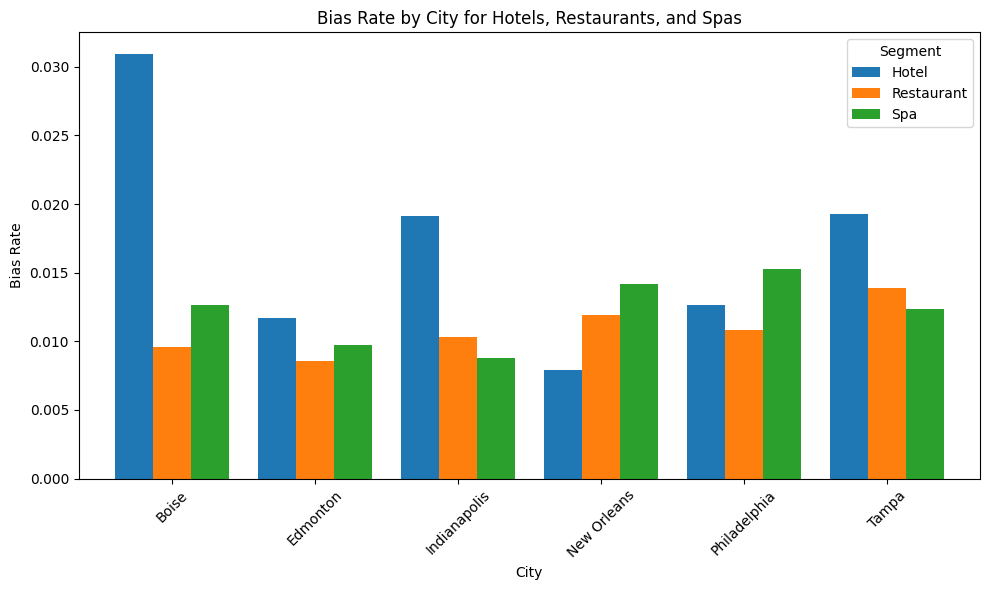

In [18]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # 1. Load processed data
# df = pd.read_parquet('/content/drive/MyDrive/processed_reviews.parquet')

# 2. Filter to the three hospitality segments
keep = ['Hotel', 'Restaurant', 'Spa']
df_filt = df[df['segment'].isin(keep)]

# 3. Compute bias rate per city‐segment
seg_stats = (
    df_filt
    .groupby(['city','segment'])['is_biased']
    .agg(total='size', biased='sum')
    .reset_index()
)
seg_stats['bias_rate'] = seg_stats['biased'] / seg_stats['total']

# 4. Pivot into a wide DataFrame: rows=city, cols=segment
pivot = seg_stats.pivot(index='city', columns='segment', values='bias_rate')[keep]

# 5. Plot grouped bar chart
plt.figure(figsize=(10,6))
pivot.plot(kind='bar', rot=45, figsize=(10,6), width=0.8)
plt.title("Bias Rate by City for Hotels, Restaurants, and Spas")
plt.ylabel("Bias Rate")
plt.xlabel("City")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


<ipython-input-24-235fb2054a58>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('name')
<ipython-input-24-235fb2054a58>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


                                   name  total_reviews  biased_count
1190                        Burger King             73             5
2182  Dick's Last Resort - Indianapolis             14             5
3983                    Jack in the Box             64             6
6430          Popeyes Louisiana Kitchen             96             7
9148                           Wingstop             54             7
1653             Chipotle Mexican Grill            180             9
4172                                KFC             74            11
9048                            Wendy's            106            11
7761                          Taco Bell            166            16
5127                         McDonald's            324            32


<Axes: xlabel='biased_count', ylabel='name'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21416 (\N{CJK UNIFIED IDEOGRAPH-53A8}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 23578 (\N{CJK UNIFIED IDEOGRAPH-5C1A}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 40635 (\N{CJK UNIFIED IDEOGRAPH-9EBB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36771 (\N{CJK UNIFIED IDEOGRAPH-8FA3}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

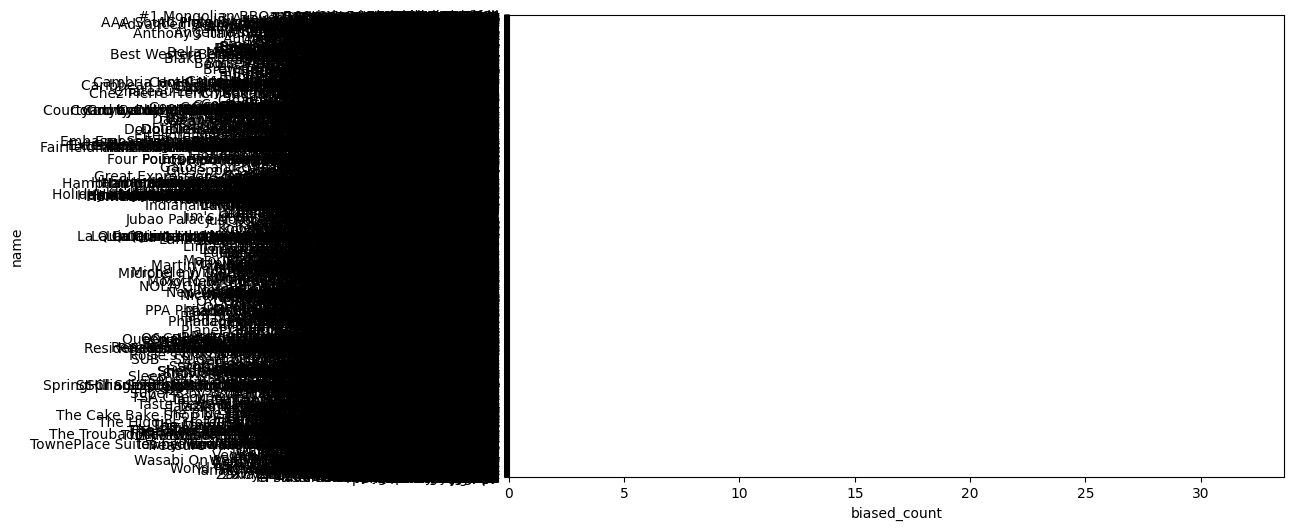

In [24]:
# 2. Compute per-business stats
biz_stats = (
    df
    .groupby('name')
    .agg(
        total_reviews=('is_biased', 'size'),
        biased_count=('is_biased', 'sum')
    )
    .reset_index()
)

# 3. Select the top 10 by biased_count
top10 = biz_stats.nlargest(10, 'biased_count').sort_values('biased_count')
print(top10)

# 5. Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=top10,
    x='biased_count',
    y='name',
    palette='magma',
    ax=ax
)

In [25]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium

# Load the combined CSV (with date parsing)
df = pd.read_csv(
    '/content/drive/MyDrive/combined_cities.csv',
    parse_dates=['date'],
    dayfirst=False
)

# (Then repeat the same steps: compute nbhd_stats, reverse geocode, top_nbhd, top_businesses, folium map)


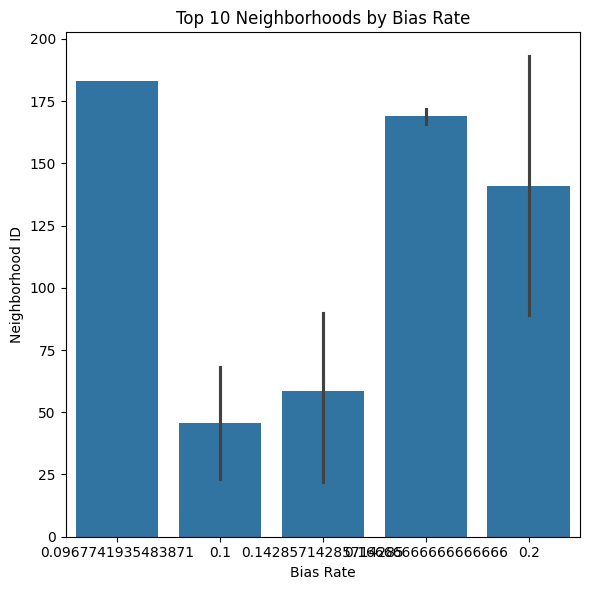

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.barplot(
    data=nbhd_rate.head(10),
    x='bias_rate',
    y='neighborhood_id'
)
plt.title("Top 10 Neighborhoods by Bias Rate")
plt.xlabel("Bias Rate")
plt.ylabel("Neighborhood ID")
plt.tight_layout()
plt.show()


In [27]:
# Install necessary packages
!pip install geopy folium

import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium

# 1. Load the processed DataFrame
df = pd.read_parquet('/content/drive/MyDrive/processed_reviews.parquet')

# 2. Compute neighborhood-level stats
nbhd_stats = (
    df
    .groupby('neighborhood_id')
    .agg(
        total_reviews=('is_biased','size'),
        biased_reviews=('is_biased','sum'),
        centroid_latitude=('latitude','mean'),
        centroid_longitude=('longitude','mean')
    )
    .assign(bias_rate=lambda x: x['biased_reviews'] / x['total_reviews'])
    .reset_index()
)

# 3. Reverse-geocode centroids to get neighborhood names
geolocator = Nominatim(user_agent="bias_analysis")
# rate limiter to avoid overloading the service
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def reverse_geocode(lat, lon):
    try:
        location = geocode((lat, lon), exactly_one=True)
        return location.raw.get('address', {}).get('neighbourhood') or location.raw.get('display_name')
    except:
        return None

nbhd_stats['neighborhood_name'] = nbhd_stats.apply(
    lambda row: reverse_geocode(row['centroid_latitude'], row['centroid_longitude']), axis=1
)

# 4. Sample top 5 neighborhoods by bias_rate
top_nbhd = nbhd_stats.nlargest(5, 'bias_rate')

# 5. For each top neighborhood, get its top 3 businesses driving bias
top_businesses = {}
for nbhd_id in top_nbhd['neighborhood_id']:
    subset = df[df['neighborhood_id'] == nbhd_id]
    top_biz = (
        subset[subset['is_biased'] == 1]
        .groupby('name')
        .size()
        .nlargest(3)
        .reset_index(name='biased_count')
    )
    top_businesses[nbhd_id] = top_biz

# 6. Create a Folium map of clusters
# Center map on the overall mean
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add circle markers for top neighborhoods
for _, row in top_nbhd.iterrows():
    nbhd_id = row['neighborhood_id']
    name = row['neighborhood_name'] or f"Neighborhood {nbhd_id}"
    popup_text = f"<b>{name}</b><br>Bias rate: {row['bias_rate']:.2%}<br>"
    # list top businesses
    biz_list = top_businesses.get(nbhd_id)
    if biz_list is not None and not biz_list.empty:
        popup_text += "<u>Top biased businesses</u><br>"
        for _, br in biz_list.iterrows():
            popup_text += f"{br['name']}: {br['biased_count']}<br>"
    folium.CircleMarker(
        location=(row['centroid_latitude'], row['centroid_longitude']),
        radius= row['bias_rate'] * 100,  # scale for visibility
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

# 7. Display map
m


<ipython-input-27-ac145c2d3c06>:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('name')
<ipython-input-27-ac145c2d3c06>:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('name')
<ipython-input-27-ac145c2d3c06>:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('name')
<ipython-input-27-ac145c2d3c06>:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a